In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np

In [2]:
species_level = pd.read_csv("the_micro_data_for_R.csv")
clinical_data = pd.read_csv("clinical_data_p_filter.csv")

In [3]:
indexes = clinical_data['Unnamed: 0']
df = pd.DataFrame({'Index':indexes})
for i in species_level.columns[1:]:
    tmp_id = i.split('_')[0]+'-'+i.split('_')[1]+'-V'
    df[tmp_id] = clinical_data[tmp_id]

In [4]:
micro_names = species_level['names']
species_data = species_level.iloc[:,1:]
P_data = species_data.iloc[:,:31]
P_data = np.array(P_data)
N_data = species_data.iloc[:,31:]
N_data = np.array(N_data)
patient_ids = species_data.columns
disease_type = ['PCOS']*31+['CON']*24
species_data = np.array(species_data)

In [5]:
micro_names

0           Methanobrevibacter_smithii
1            Methanosphaera_stadtmanae
2      Actinobaculum_sp_oral_taxon_183
3             Actinomyces_cardiffensis
4                 Actinomyces_georgiae
                    ...               
509         Fretibacterium_fastidiosum
510           Pyramidobacter_piscolens
511            Pyramidobacter_sp_C12_8
512            Akkermansia_muciniphila
513           Saccharomyces_cerevisiae
Name: names, Length: 514, dtype: object

In [6]:
diff_indexes = []
ps = []
for i in range(len(micro_names)):
    p = stats.ttest_ind(P_data[i],N_data[i],equal_var=False)[1]
#     print(micro_names[i],p)
    if p < 0.05:
        diff_indexes.append(i)
        ps.append(p)
sorted_diff_indexes = np.array(diff_indexes)[np.argsort(ps)]

In [7]:
sorted_diff_indexes

array([  2, 267,  17,  59,  57, 266, 137, 303,  56, 154,  46,  45, 262,
        51,   8])

In [8]:
micro_names[diff_indexes]

2      Actinobaculum_sp_oral_taxon_183
8               Actinomyces_naeslundii
17       Actinomyces_sp_oral_taxon_181
45                  Atopobium_parvulum
46                     Atopobium_rimae
51             Collinsella_aerofaciens
56         Adlercreutzia_equolifaciens
57             Asaccharobacter_celatus
59            Enterorhabdus_caecimuris
137                  Gemella_sanguinis
154              Enterococcus_faecalis
262                 Eubacterium_brachy
266                  Eubacterium_sulci
267             Mogibacterium_diversum
303                  Dorea_longicatena
Name: names, dtype: object

In [9]:
data = species_level.iloc[sorted_diff_indexes,:]
names = list(data['names'])
disease_type = (['PCOS']*31+['CON']*24)*len(names)
df = pd.DataFrame({'V1':disease_type})
values = []
types = []
for idx,name in enumerate(data['names']):
    values += list(data.iloc[idx,1:])
    types += [name]*55
df['Value'] = values
df['Type'] = types

In [10]:
df

,V1,Value,Type
0,PCOS,0.00000,Actinobaculum_sp_oral_taxon_183
1,PCOS,0.00238,Actinobaculum_sp_oral_taxon_183
2,PCOS,0.00000,Actinobaculum_sp_oral_taxon_183
3,PCOS,0.00000,Actinobaculum_sp_oral_taxon_183
4,PCOS,0.01192,Actinobaculum_sp_oral_taxon_183
...,...,...,...
820,CON,0.00000,Actinomyces_naeslundii
821,CON,0.00000,Actinomyces_naeslundii
822,CON,0.00369,Actinomyces_naeslundii
823,CON,0.00000,Actinomyces_naeslundii


In [11]:
value_matrix = []
p_matrix = []
cor_values=[]
for i in range(len(sorted_diff_indexes)):
    values = []
    ps = []
    for j in range(clinical_data.shape[0]):
        value,p = stats.spearmanr(species_data[sorted_diff_indexes[i]],np.array(clinical_data.iloc[j,1:].astype(float)))
        values.append(value)
        ps.append(p)
    cor_values.append(np.mean(values))
    value_matrix.append(values)
    p_matrix.append(ps)
value_matrix = np.array(value_matrix)
p_matrix = np.array(p_matrix)

In [12]:
# reordering
sorted_diff_indexes = np.array(sorted_diff_indexes)[np.argsort(cor_values)[::-1]]

In [13]:
value_matrix = []
p_matrix = []
cor_values=[]
for i in range(len(sorted_diff_indexes)):
    values = []
    ps = []
    for j in range(clinical_data.shape[0]):
        value,p = stats.spearmanr(species_data[sorted_diff_indexes[i]],np.array(clinical_data.iloc[j,1:].astype(float)))
        values.append(value)
        ps.append(p)
    cor_values.append(np.mean(values))
    value_matrix.append(values)
    p_matrix.append(ps)
value_matrix = np.array(value_matrix)
p_matrix = np.array(p_matrix)

In [14]:
p_sig = []
for i in range(p_matrix.shape[0]):
    tmp = []
    for j in range(p_matrix.shape[1]):
        if p_matrix[i][j] < 0.01:
            tmp.append('**')
        elif p_matrix[i][j] < 0.05:
            tmp.append('*')
        else:
            tmp.append(' ')
    p_sig.append(tmp)
p_sig = np.array(p_sig)

In [15]:
micros = []
clinics = []
correlation_values = []
p_values = []
clinic_names = indexes
diff_micro_names = list(micro_names[sorted_diff_indexes])
for i,j in enumerate(value_matrix):
    for m,n in enumerate(j):
        micros.append(diff_micro_names[i])
        clinics.append(clinic_names[m])
        correlation_values.append(value_matrix[i][m])
        p_values.append(p_matrix[i][m])
micro_clinic_cor = pd.DataFrame({'micro':micros,'clinic':clinics,'cor_value':correlation_values,'p_value':p_values})
# micro_clinic_cor.to_csv("micro_clinic_cor.csv",index=False)

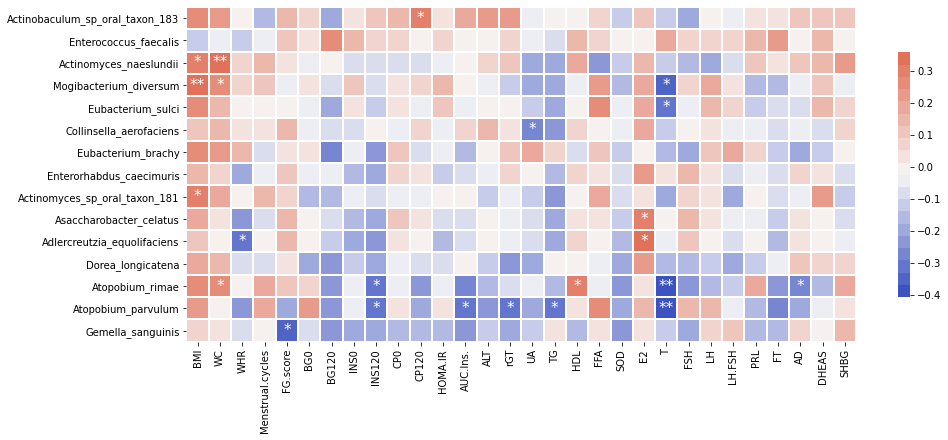

In [17]:
colorslist = ['#3c52c0','#f7f7f7','#e17159']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=20)
# plt.figure()
fig, ax = plt.subplots(1, figsize=(15, 15))
sns.heatmap(value_matrix,linewidths=1,square=True,annot=p_sig,fmt="",annot_kws={'size':15},xticklabels=indexes,yticklabels=micro_names[sorted_diff_indexes],cmap=cmaps,cbar_kws={"shrink": .3})
# plt.savefig("cor_micro_clinical_filter.pdf",dpi=600,bbox_inches='tight')
np.savetxt('./new_cor_meta_clinical_filter.csv',value_matrix,delimiter = ',')
np.savetxt('./new_cor_meta_clinical_filter_p.csv',p_matrix,delimiter = ',')

In [18]:
meta_data = pd.read_csv("diff_meta_data.csv",encoding='latin-1')

In [19]:
meta_data

,Metabolite,Vip_plsda,Vip_oplsda,P_value,fdr,FC,NOP_1_V,NOP_2_V,NOP_3_V,NOP_4_V,...,P_33_V,P_35_V,P_36_V,P_37_V,P_38_V,P_42_V,P_43_V,P_44_V,P_45_V,P_46_V
0,"(-)-trans-3,4-Dihydro-4,8-dihydroxy-3-methyl-1...",1.338332,1.466024,0.029540,0.18870,1.052104,2.331424,2.174909,2.244286,2.235844,...,2.761152,2.695946,2.424025,2.372839,2.889221,2.748250,2.901715,2.985266,2.823890,2.953216
1,"5,7-Megastigmadien-9-ol glucoside",1.197454,1.243908,0.040220,0.22640,0.897106,1.394501,1.416013,1.273385,1.419751,...,0.624112,1.103785,1.168172,1.227592,1.780798,1.013346,0.901012,1.096308,1.021868,1.519554
2,12(R)-HETE,2.213835,2.401713,0.010390,0.09280,0.864634,3.353578,2.495355,2.100735,2.473216,...,2.169302,2.298411,2.189361,1.919389,2.720438,2.133449,2.632870,2.464761,1.928536,2.419411
3,(E)-Casimiroedine,1.872757,1.877915,0.019690,0.14580,1.285961,0.566103,0.749639,1.704129,1.260289,...,1.626634,0.909191,1.406193,1.803274,1.149043,1.316012,0.584338,1.557941,1.168388,0.252256
4,Norerythromycin,1.583857,1.850561,0.013850,0.11310,0.915647,2.470787,1.870212,2.237793,2.091319,...,2.307860,1.968387,2.314430,2.108112,2.021069,2.086628,2.014930,2.097573,2.073888,2.128508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,N6-Acetyl-L-lysine,1.460415,2.181479,0.013640,0.10250,1.144625,2.159907,1.010858,1.672411,2.095835,...,2.760367,2.874544,2.450089,2.454271,3.131012,2.812154,3.163040,3.223073,2.898630,3.002887
112,Succinylproline,1.670228,1.434421,0.002783,0.04375,1.134907,1.105551,1.230671,1.331081,1.303636,...,1.078510,1.160689,1.431693,1.139531,1.525301,1.179402,1.460503,1.188568,1.498377,1.520886
113,L-Proline,0.954765,1.063744,0.038920,0.17310,1.032071,2.564328,2.594839,2.606466,2.706969,...,2.809690,2.793167,2.504211,2.963229,3.025764,2.542849,2.400046,2.645098,2.786383,2.375718
114,Choline,0.602190,0.757326,0.041520,0.17860,0.978341,2.832748,2.694973,2.534672,2.721140,...,2.726300,2.728491,2.697671,2.894764,2.614873,2.770864,2.660010,2.583559,2.542512,2.645721


In [20]:
# ordering the micro-level
diff_indexes = []
ps = []
for i in range(len(micro_names)):
    p = stats.ttest_ind(P_data[i],N_data[i],equal_var=False)[1]
#     print(micro_names[i],p)
    if p < 0.05:
        diff_indexes.append(i)
        ps.append(p)
sorted_diff_indexes = np.array(diff_indexes)[np.argsort(ps)]

In [21]:
ids = meta_data.columns[6:]
meta_names = meta_data['Metabolite']
ps = meta_data['P_value']
sorted_indexes = np.argsort(ps)[:20]
# sorted_indexes = np.argsort(ps)
# sorted_indexes = [92]+list(sorted_indexes)[:3]+list(sorted_indexes)[4:]
top20_meta_names = np.array(meta_names)[sorted_indexes]
meta_data_sorted = meta_data.iloc[sorted_indexes,6:]
df_meta = pd.DataFrame({'Index':top20_meta_names})
df_micro = pd.DataFrame({'Index':list(micro_names[sorted_diff_indexes])})
for i in species_level.columns[1:]:
    tmp_id = i.split('_')[0]+'_'+i.split('_')[1]+'_V'
    if tmp_id in meta_data_sorted:
        df_meta[i] = list(meta_data_sorted[tmp_id])
        df_micro[i] = list(species_level[i][sorted_diff_indexes])

In [22]:
value_matrix = []
p_matrix = []
cor_values = []
for i in range(len(top20_meta_names)):
    values = []
    ps = []
    for j in range(df_micro.shape[0]):
        value,p = stats.spearmanr(np.array(df_meta.iloc[i,1:]),np.array(df_micro.iloc[j,1:].astype(float)))
        values.append(value)
        ps.append(p)
    cor_values.append(np.mean(values))
    value_matrix.append(values)
    p_matrix.append(ps)
value_matrix = np.array(value_matrix)
p_matrix = np.array(p_matrix)

In [23]:
sorted_indexes = np.array(sorted_indexes)[np.argsort(cor_values)[::-1]]
sorted_indexes = [92,87]+list(sorted_indexes[2:])
top20_meta_names = np.array(meta_names)[sorted_indexes]
meta_data_sorted = meta_data.iloc[sorted_indexes,6:]
df_meta = pd.DataFrame({'Index':top20_meta_names})
df_micro = pd.DataFrame({'Index':list(micro_names[sorted_diff_indexes])})
for i in species_level.columns[1:]:
    tmp_id = i.split('_')[0]+'_'+i.split('_')[1]+'_V'
    if tmp_id in meta_data_sorted:
        df_meta[i] = list(meta_data_sorted[tmp_id])
        df_micro[i] = list(species_level[i][sorted_diff_indexes])
value_matrix = []
p_matrix = []
cor_values = []
for i in range(len(top20_meta_names)):
    values = []
    ps = []
    for j in range(df_micro.shape[0]):
        value,p = stats.spearmanr(np.array(df_meta.iloc[i,1:]),np.array(df_micro.iloc[j,1:].astype(float)))
        values.append(value)
        ps.append(p)
    cor_values.append(np.mean(values))
    value_matrix.append(values)
    p_matrix.append(ps)
value_matrix = np.array(value_matrix)
p_matrix = np.array(p_matrix)

In [24]:
p_sig = []
for i in range(p_matrix.shape[0]):
    tmp = []
    for j in range(p_matrix.shape[1]):
        if p_matrix[i][j] < 0.01:
            tmp.append('**')
        elif p_matrix[i][j] < 0.05:
            tmp.append('*')
        else:
            tmp.append(' ')
    p_sig.append(tmp)
p_sig = np.array(p_sig)

<AxesSubplot:>

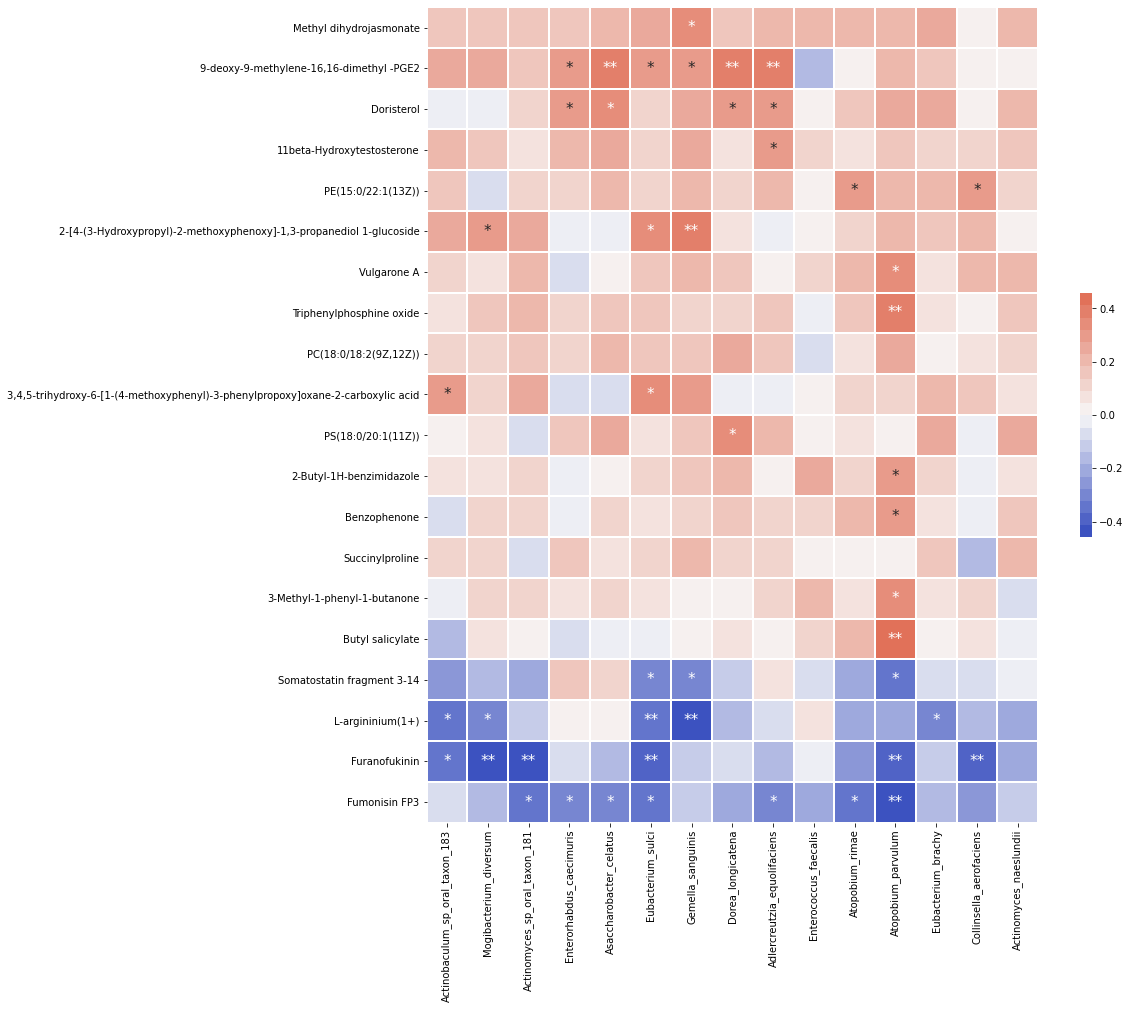

In [25]:
micros = []
metas = []
correlation_values = []
p_values = []
meta_names = top20_meta_names
diff_micro_names = list(micro_names[sorted_diff_indexes])
for i,j in enumerate(value_matrix):
    for m,n in enumerate(j):
        metas.append(meta_names[i])
        micros.append(diff_micro_names[m])
        correlation_values.append(value_matrix[i][m])
        p_values.append(p_matrix[i][m])
micro_clinic_cor = pd.DataFrame({'meta':metas,'micro':micros,'cor_value':correlation_values,'p_value':p_values})
# micro_clinic_cor.to_csv("meta_micro_cor.csv",index=False)
colorslist = ['#3c52c0','#f7f7f7','#e17159']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=20)
# plt.figure()
fig, ax = plt.subplots(1, figsize=(15, 15))
sns.heatmap(value_matrix,linewidths=1,square=True,annot=p_sig,fmt="",annot_kws={'size':15},xticklabels=list(micro_names[sorted_diff_indexes]),yticklabels=top20_meta_names,cmap=cmaps,cbar_kws={"shrink": .3})
# plt.savefig("cor_meta_micro.pdf",dpi=600,bbox_inches='tight')

Text(0.5, 0, 'False Positive Rate')

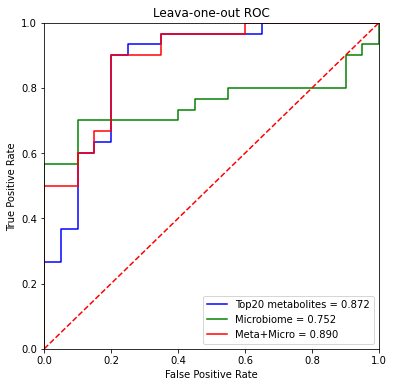

In [26]:
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# leave-one-out lasso regression
meta_train = np.array(df_meta.iloc[:,1:]).T
labels = np.array([1]*30+[0]*20)
alpha = 0.005
lasso = Lasso(alpha=alpha)
y_scores=[]
for i in range(meta_train.shape[0]):
    test = meta_train[i,:].reshape(1,-1)
    train = np.r_[meta_train[:i,:],meta_train[i+1:,:]]
    label = np.r_[labels[:i],labels[i+1:]]
    y_score = lasso.fit(train,label).predict(test)
    y_scores.append(y_score)
fpr1, tpr1, threshold = metrics.roc_curve(labels, y_scores)
roc_auc1 = metrics.auc(fpr1, tpr1)

micro_train = np.array(df_micro.iloc[:,1:]).T
labels = np.array([1]*30+[0]*20)
alpha = 0.0005
lasso = Lasso(alpha=alpha)
y_scores=[]
for i in range(meta_train.shape[0]):
    test = micro_train[i,:].reshape(1,-1)
    train = np.r_[micro_train[:i,:],micro_train[i+1:,:]]
    label = np.r_[labels[:i],labels[i+1:]]
    y_score = lasso.fit(train,label).predict(test)
    y_scores.append(y_score)
roc_auc_score(labels,y_scores)
fpr2, tpr2, threshold = metrics.roc_curve(labels, y_scores)
roc_auc2 = metrics.auc(fpr2, tpr2)

micro_meta_train = np.c_[np.array(df_micro.iloc[:,1:]).T,np.array(df_meta.iloc[:,1:]).T]
labels = np.array([1]*30+[0]*20)
alpha = 0.01
lasso = Lasso(alpha=alpha)
y_scores=[]
for i in range(micro_meta_train.shape[0]):
    test = micro_meta_train[i,:].reshape(1,-1)
    train = np.r_[micro_meta_train[:i,:],micro_meta_train[i+1:,:]]
    label = np.r_[labels[:i],labels[i+1:]]
    y_score = lasso.fit(train,label).predict(test)
    y_scores.append(y_score)
roc_auc_score(labels,y_scores)
fpr3, tpr3, threshold = metrics.roc_curve(labels, y_scores)
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.figure(figsize=(6,6))
plt.title('Leava-one-out ROC')
plt.plot(fpr1, tpr1, 'blue', label = 'Top20 metabolites = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, 'green', label = 'Microbiome = %0.3f' % roc_auc2)
plt.plot(fpr3, tpr3, 'red', label = 'Meta+Micro = %0.3f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.savefig("Lasso_comparison.pdf",dpi=600,bbox_inches='tight')

In [27]:
# correalation network
import networkx as nx
micro_clinics = pd.read_csv("micro_clinic_cor.csv")
meta_clinics = pd.read_csv("meta_clinic_cor.csv")
meta_micro = pd.read_csv("meta_micro_cor.csv")
merged_cor = np.r_[np.array(micro_clinics),np.array(meta_clinics),np.array(meta_micro)]

In [28]:
G = nx.Graph()
nodes = []
edges = []
for i in merged_cor:
    if i[3]<0.05 and np.abs(i[2])> 0.4:
        if i[0] not in nodes:
            nodes.append(i[0])
        if i[1] not in nodes:
            nodes.append(i[1])
        if i[2]>0:
            G.add_edge(i[0], i[1], color='#FF5F81', weight=i[2]*8)
        else:
            G.add_edge(i[0], i[1], color='#51DBFF', weight=-i[2]*8)

In [29]:
G.nodes()

NodeView(('Atopobium_parvulum', 'T', 'Methyl dihydrojasmonate', 'FG.score', 'INS0', 'CP0', 'ALT', '2-[4-(3-Hydroxypropyl)-2-methoxyphenoxy]-1,3-propanediol 1-glucoside', 'INS120', 'AUC.Ins.', 'IL6', 'FT', '3,4,5-trihydroxy-6-[1-(4-methoxyphenyl)-3-phenylpropoxy]oxane-2-carboxylic acid', 'CP120', '9-deoxy-9-methylene-16,16-dimethyl -PGE2', 'TG', 'PE(15:0/22:1(13Z))', '11beta-Hydroxytestosterone', '3-Methyl-1-phenyl-1-butanone', 'rGT', 'DHEAS', 'L-argininium(1+)', 'FFA', 'Fumonisin FP3', 'WC', 'Furanofukinin', 'SOD', 'Gemella_sanguinis', 'Mogibacterium_diversum', 'Actinomyces_sp_oral_taxon_181', 'Butyl salicylate'))

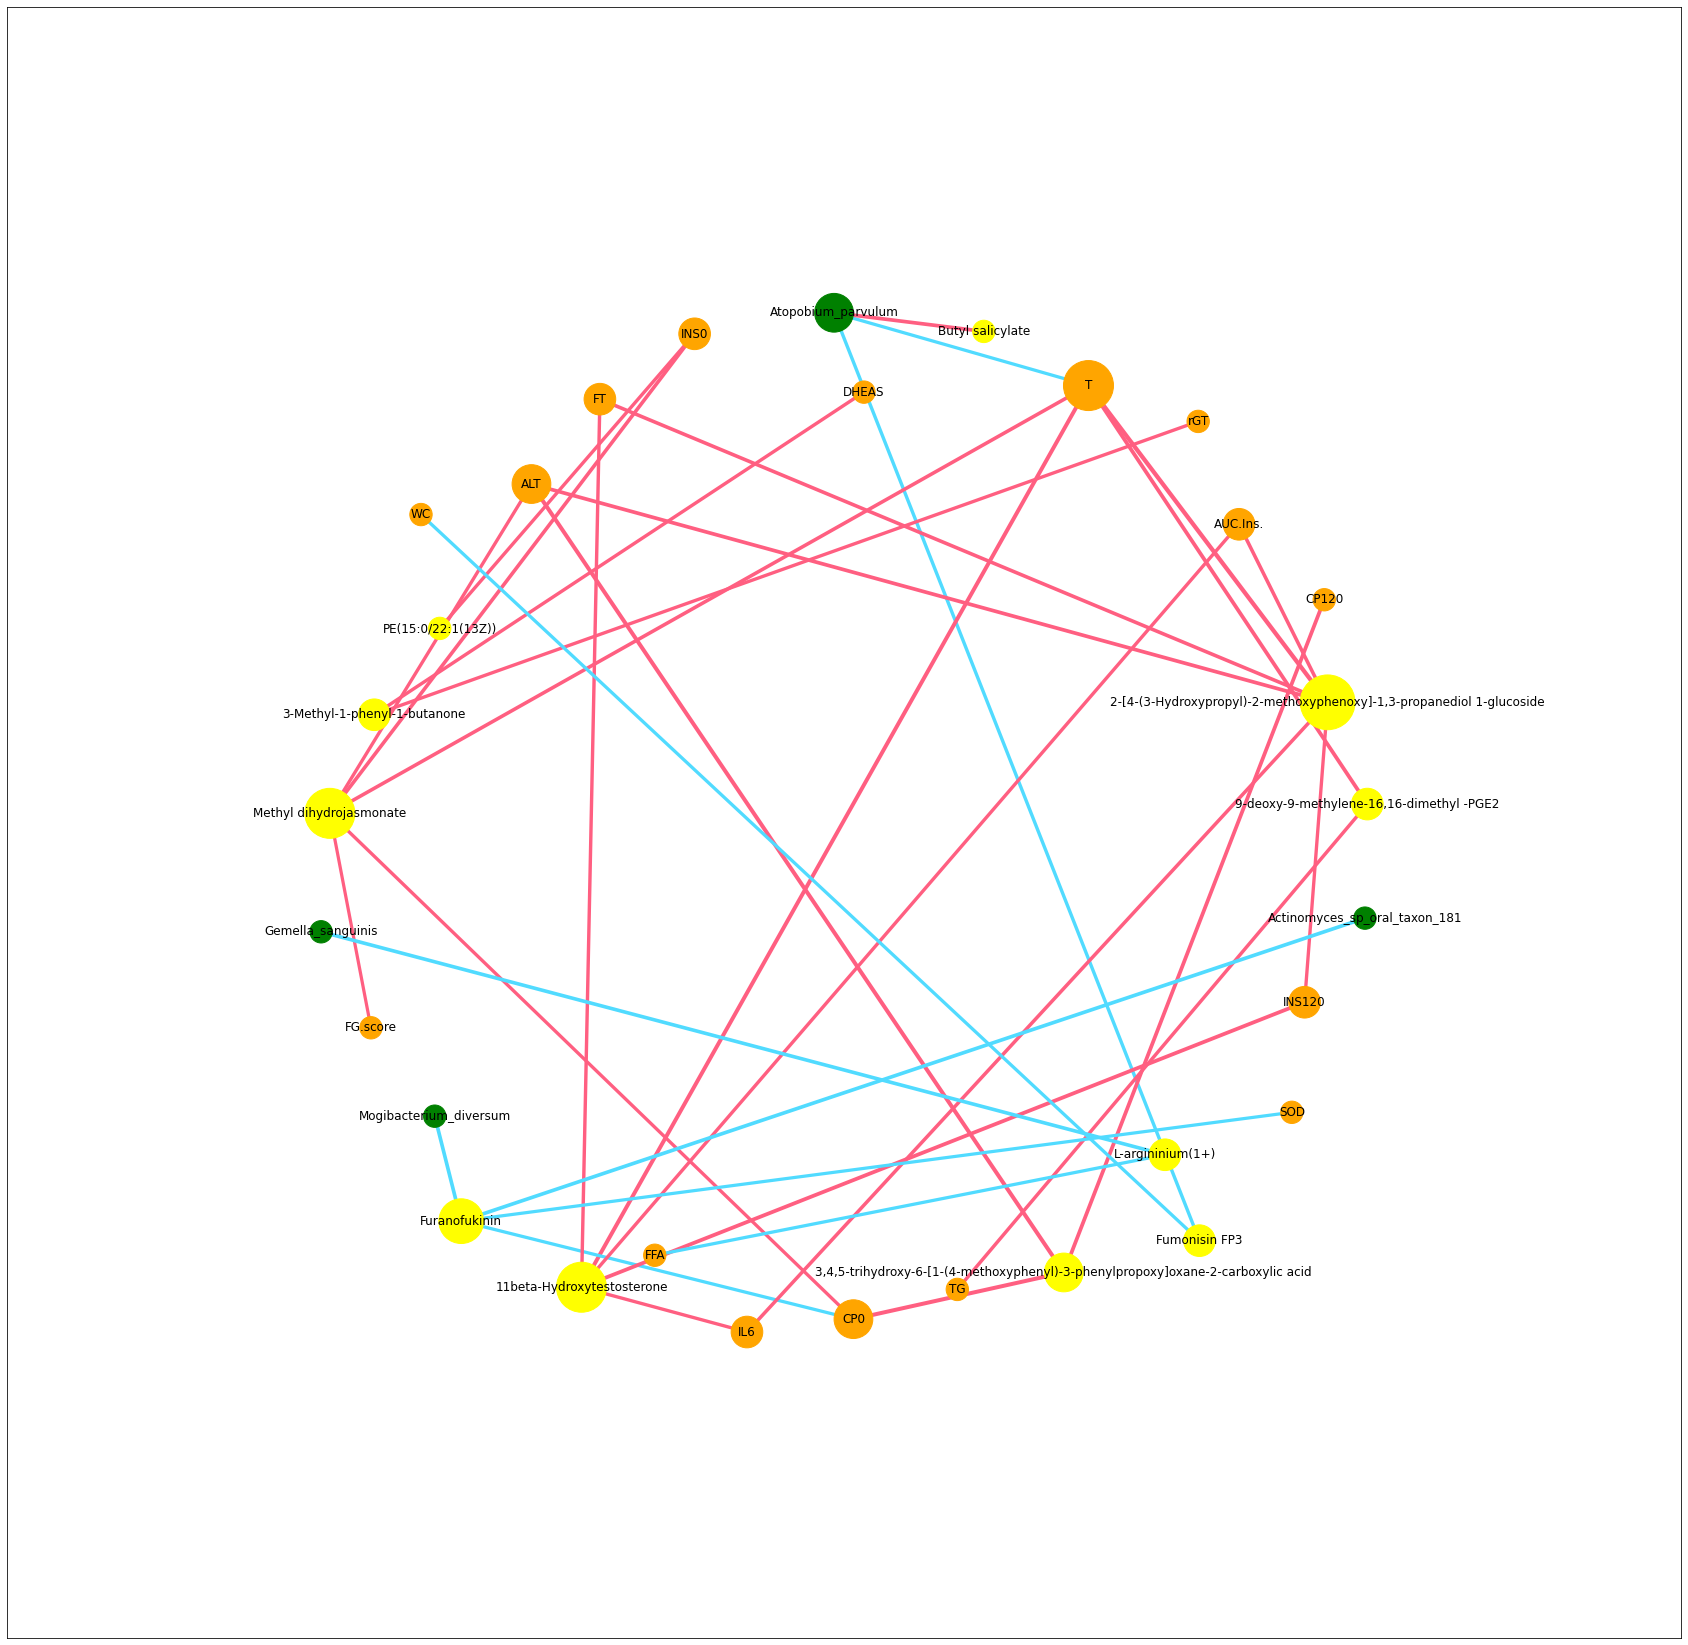

In [30]:
# G = nx.Graph()
# G.add_nodes_from(set(nodes))
# G.add_weighted_edges_from(edges)
ax = plt.figure(figsize=(30,30))
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]
node_colors = []
for i in G.nodes():
    if i in list(micro_clinics['micro']):
        node_colors.append("green")
    elif i in list(micro_clinics['clinic']):
        node_colors.append('orange')
    else:
        node_colors.append('yellow')
pos = nx.spring_layout(G,k=40/np.sqrt(G.order()),seed=1200)
# pos = nx.circular_layout(G)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.3
y_max = max(y_values)
y_min = min(y_values)
y_margin = (y_max - y_min) * 0.3
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)
nx.draw_networkx(G,pos,node_size = [v * 500 for v in dict(nx.degree(G)).values()], edge_color=colors, width=weights,node_color = node_colors)
# plt.savefig("cor_network.pdf",dpi=600,bbox_inches='tight')